In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [23]:
image_path = 'dataset/2.jpg'

In [24]:
img = cv2.imread(image_path, 0)
sigma_lst = [2.5, 5, 10]

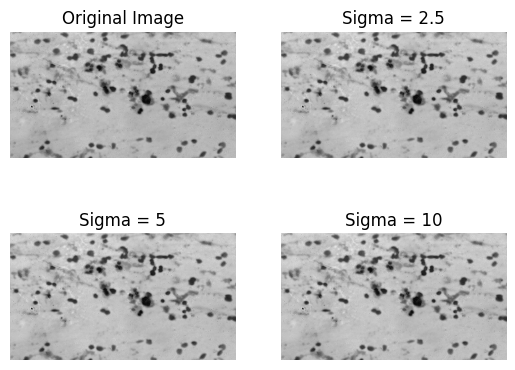

In [25]:
plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

len_sigma = len(sigma_lst)
for i in range(len_sigma):
    img_gauss = cv2.GaussianBlur(img, (5, 5), sigma_lst[i])
    plt.subplot(2, 2, i+2)
    plt.title('Sigma = ' + str(sigma_lst[i]))
    plt.imshow(img_gauss, cmap='gray')
    plt.axis('off')

plt.show()

In [26]:
def gaussian_kernel(size, sigma):
    if size % 2 == 0:
        size = size + 1

    max_point = size // 2  # both directions (x,y) maximum cell start point
    min_point = -max_point  # both directions (x,y) minimum cell start point

    K = np.zeros((size, size))  # kernel matrix
    for x in range(min_point, max_point + 1):
        for y in range(min_point, max_point + 1):
            value = 1 / (2 * np.pi * sigma ** 2) * np.exp(-(x ** 2 + y ** 2) / (2 * sigma ** 2))
            K[x - min_point, y - min_point] = value

    return K

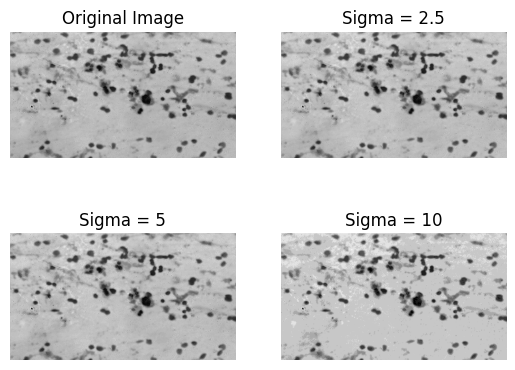

In [27]:
plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

for i in range(len_sigma):
    kernel = gaussian_kernel(5, sigma_lst[i])
    img_gauss = cv2.filter2D(img, -1, kernel)
    plt.subplot(2, 2, i+2)
    plt.title('Sigma = ' + str(sigma_lst[i]))
    plt.imshow(img_gauss, cmap='gray')
    plt.axis('off')

plt.show()